# Loan Default Prediction Project

### Step 1: Problem Statement and Dataset Introduction
### Objective: Predict whether a customer will not be able to repay  on their loan based on features like income, loan amount, etc.
### Dataset: Use a public dataset like LendingClub dataset or a similar banking dataset


## Step 2: Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV

### Step 3: Load the dataset
 Assuming 'loan_data.csv' is the dataset (change path as necessary)


In [2]:
data = pd.read_csv('loan_data.csv')
data

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466"
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2..."


In [3]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [4]:
loan_status = data['loan_status']
loan_status

0          Fully Paid
1          Fully Paid
2          Fully Paid
3          Fully Paid
4         Charged Off
             ...     
396025     Fully Paid
396026     Fully Paid
396027     Fully Paid
396028     Fully Paid
396029     Fully Paid
Name: loan_status, Length: 396030, dtype: object

### Step 4: Exploratory Data Analysis (EDA)
 Check basic info

The DataFrame.info() function in pandas provides a concise summary of a DataFrame's structure. It displays essential information such as the number of non-null values in each column, the data types of the columns, and the overall memory usage of the DataFrame. Specifically, it shows the total number of rows, the index range, column names, non-null counts for each column (indicating missing data if any), and the data types (like integers, floats, objects). This function is particularly useful for getting a quick overview of a dataset and identifying potential issues, such as missing values or incorrect data types.

In [5]:
data.info

<bound method DataFrame.info of         loan_amnt        term  int_rate  installment grade sub_grade  \
0         10000.0   36 months     11.44       329.48     B        B4   
1          8000.0   36 months     11.99       265.68     B        B5   
2         15600.0   36 months     10.49       506.97     B        B3   
3          7200.0   36 months      6.49       220.65     A        A2   
4         24375.0   60 months     17.27       609.33     C        C5   
...           ...         ...       ...          ...   ...       ...   
396025    10000.0   60 months     10.99       217.38     B        B4   
396026    21000.0   36 months     12.29       700.42     C        C1   
396027     5000.0   36 months      9.99       161.32     B        B1   
396028    21000.0   60 months     15.31       503.02     C        C2   
396029     2000.0   36 months     13.61        67.98     C        C2   

                       emp_title emp_length home_ownership  annual_inc  ...  \
0                      M

The DataFrame.describe() function in pandas provides summary statistics for the numerical columns in a DataFrame. It calculates and displays metrics such as count (number of non-null values), mean (average), standard deviation (std), minimum (min), 25th percentile (Q1), median (50th percentile), 75th percentile (Q3), and maximum (max) values for each numeric column. These statistics give a quick sense of the distribution, spread, and central tendency of the data. It helps in understanding the range, variability, and potential outliers in the dataset. For non-numeric columns, you can use describe(include='object') to get a summary of categorical data, which includes metrics like unique values, top category, and frequency.

In [6]:
data.describe

<bound method NDFrame.describe of         loan_amnt        term  int_rate  installment grade sub_grade  \
0         10000.0   36 months     11.44       329.48     B        B4   
1          8000.0   36 months     11.99       265.68     B        B5   
2         15600.0   36 months     10.49       506.97     B        B3   
3          7200.0   36 months      6.49       220.65     A        A2   
4         24375.0   60 months     17.27       609.33     C        C5   
...           ...         ...       ...          ...   ...       ...   
396025    10000.0   60 months     10.99       217.38     B        B4   
396026    21000.0   36 months     12.29       700.42     C        C1   
396027     5000.0   36 months      9.99       161.32     B        B1   
396028    21000.0   60 months     15.31       503.02     C        C2   
396029     2000.0   36 months     13.61        67.98     C        C2   

                       emp_title emp_length home_ownership  annual_inc  ...  \
0                     

### Handle missing values (you can modify this as needed)

In [7]:
data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [8]:
data.fillna(method='ffill', inplace=True)

In [9]:
data

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466"
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2..."


### Visualizing relationships

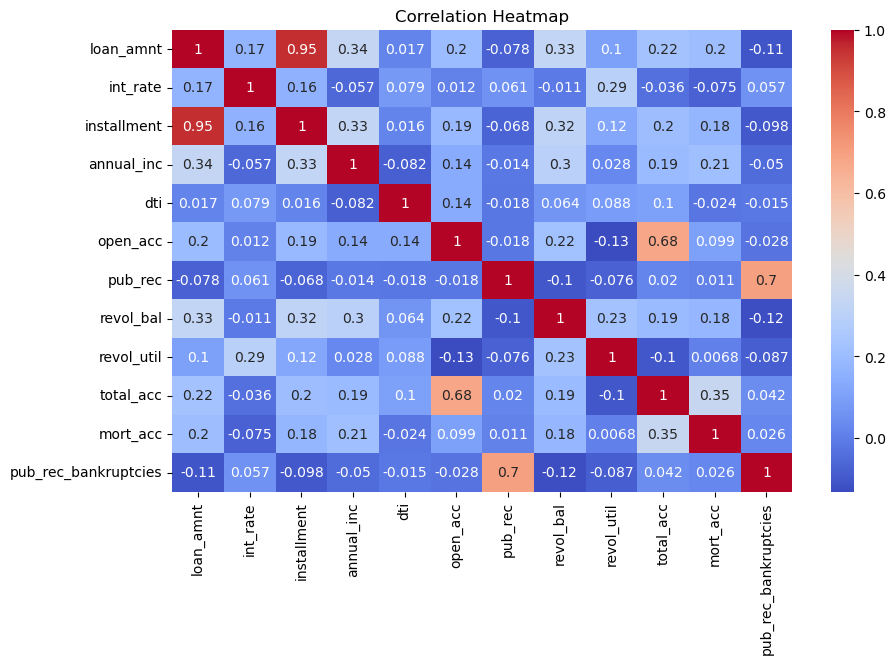

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### # Distribution of loan default (target variable)

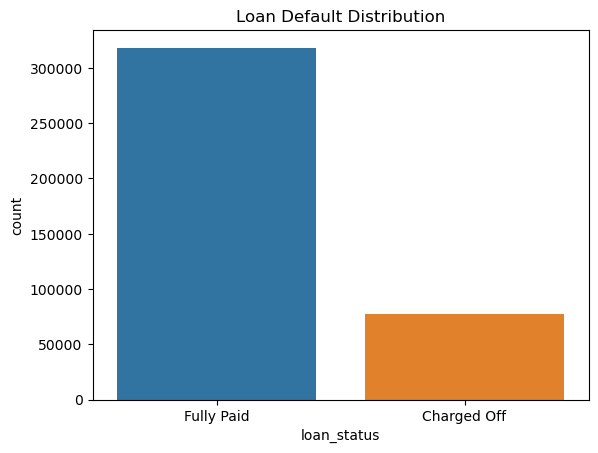

In [10]:
sns.countplot(x='loan_status', data=data)
plt.title("Loan Default Distribution")
plt.show()

### Histograms for key continuous variables

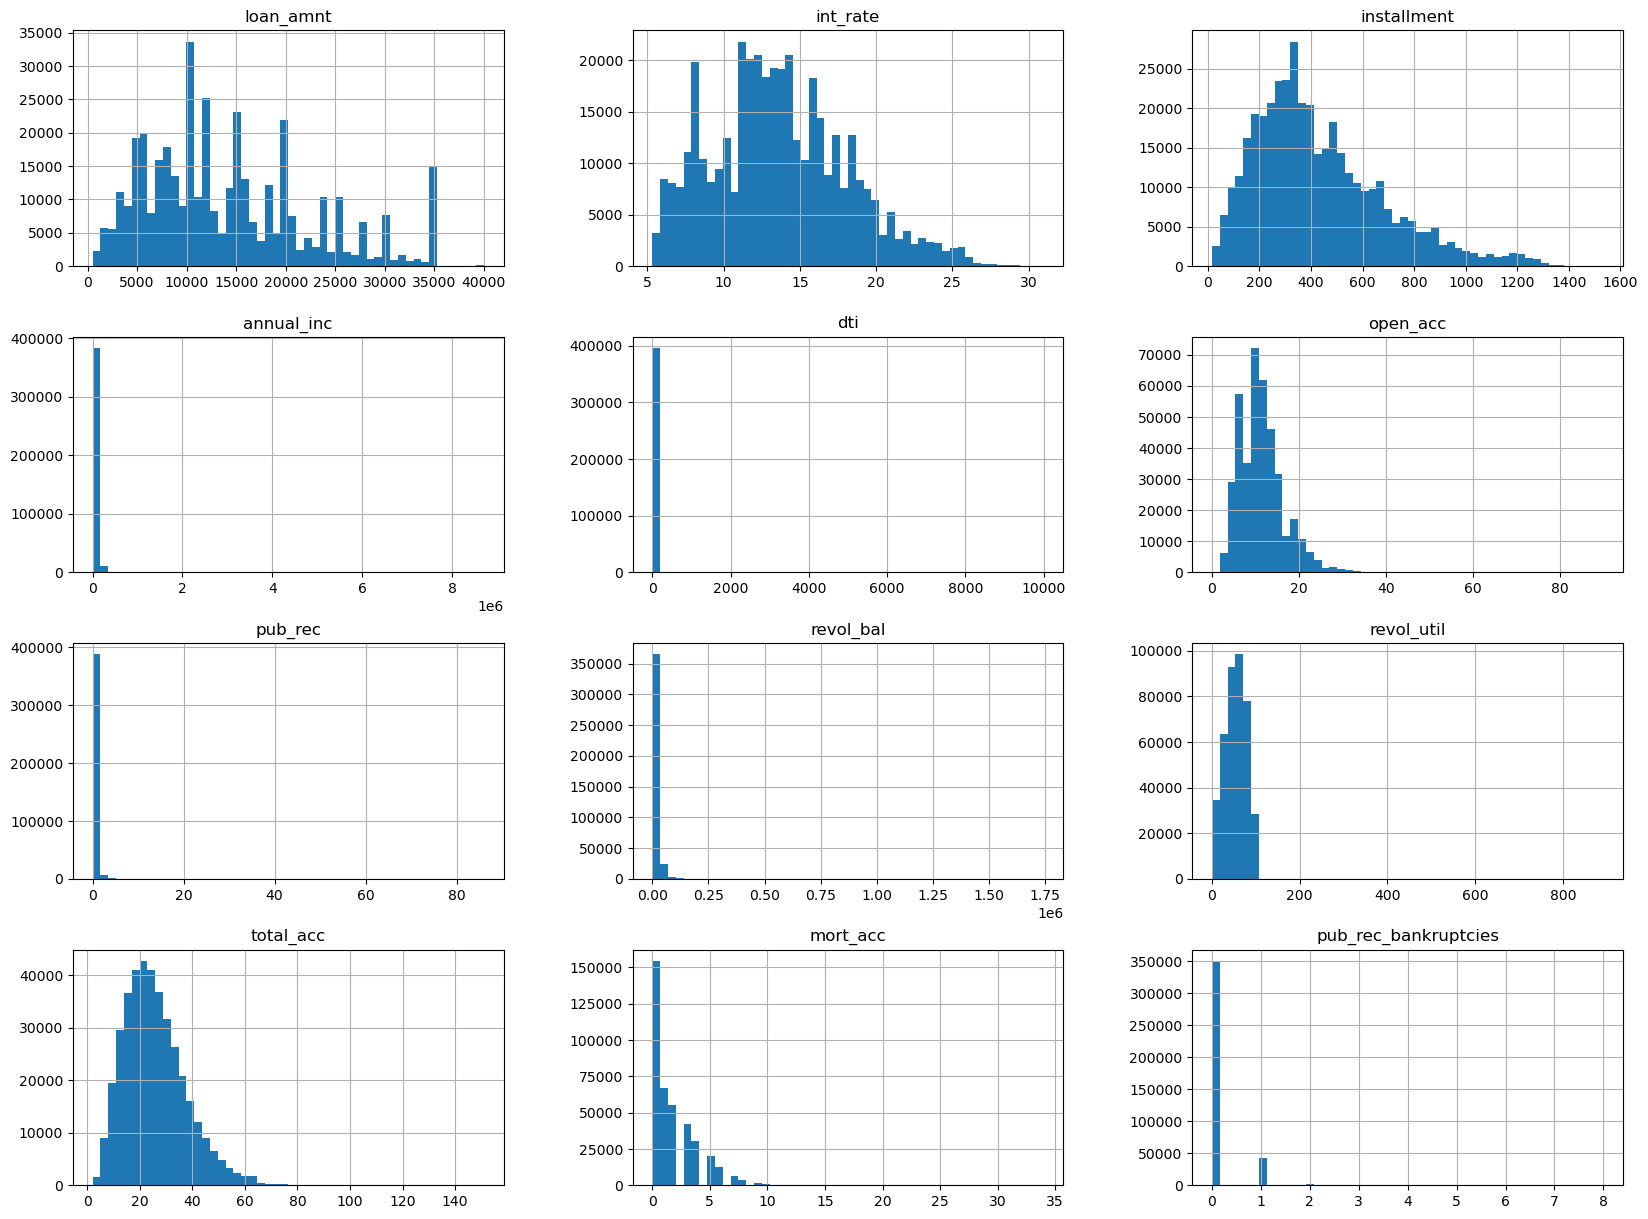

In [11]:
data.hist(bins=50, figsize=(20,15))
plt.show()

## Step 5: Data Preprocessing

In [12]:

# Categorical and numerical columns
categorical_cols = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 
                    'application_type', 'initial_list_status']

numerical_cols = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'open_acc', 
                  'revol_bal', 'revol_util', 'total_acc', 'mort_acc', 'pub_rec', 
                  'pub_rec_bankruptcies']


In [13]:
# One-hot encoding for categorical variables and scaling for numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)])


In [14]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [15]:
# Split the dataset into features and target
X = data.drop('loan_status', axis=1)  # Features
y = data['loan_status']  # Target

In [16]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 6: Model Selection and Training

In [17]:
# Pipeline for Logistic Regression
logreg_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('classifier', LogisticRegression())])


In [18]:
# Train Logistic Regression
logreg_pipeline.fit(X_train, y_train)

/Users/prakashpandey/Documents/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['loan_amnt', 'int_rate',
                                                   'installment', 'annual_inc',
                                                   'open_acc', 'revol_bal',
                                                   'revol_util', 'total_acc',
                                                   'mort_acc', 'pub_rec',
                                                   'pub_rec_bankruptcies']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['term', 'grade', 'sub_grade',
                                                   'emp_length',
                                                   'home_ownership',
                                                   'application_type',
                                                   'initial_list_status'])])),
                ('classifier', LogisticRegression())])

### Step 7: Hyperparameter Tuning with GridSearchCV (for Random Forest)

### Step 8: Model Evaluation

In [19]:
# Predictions for Logistic Regression
y_pred_logreg = logreg_pipeline.predict(X_test)

In [20]:
# Confusion Matrix for Logistic Regression
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)
print("Confusion Matrix for Logistic Regression:\n", conf_matrix_logreg)

Confusion Matrix for Logistic Regression:
 [[  603 14974]
 [  619 63010]]


In [21]:
from sklearn.preprocessing import LabelEncoder

# Encode the labels
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)
y_pred_logreg_encoded = le.transform(y_pred_logreg)

In [22]:
# Specify 'Fully Paid' as the positive label

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

accuracy = accuracy_score(y_test, y_pred_logreg)
precision = precision_score(y_test, y_pred_logreg, pos_label='Fully Paid')
recall = recall_score(y_test, y_pred_logreg, pos_label='Fully Paid')
f1 = f1_score(y_test, y_pred_logreg, pos_label='Fully Paid')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8031
Precision: 0.8080
Recall: 0.9903
F1 Score: 0.8899


In [23]:
# ROC-AUC for both models
y_pred_prob_logreg = logreg_pipeline.predict_proba(X_test)[:, 1]

roc_auc_logreg = roc_auc_score(y_test, y_pred_prob_logreg)

In [24]:
print(f"Logistic Regression ROC-AUC: {roc_auc_logreg:.4f}")

Logistic Regression ROC-AUC: 0.7035


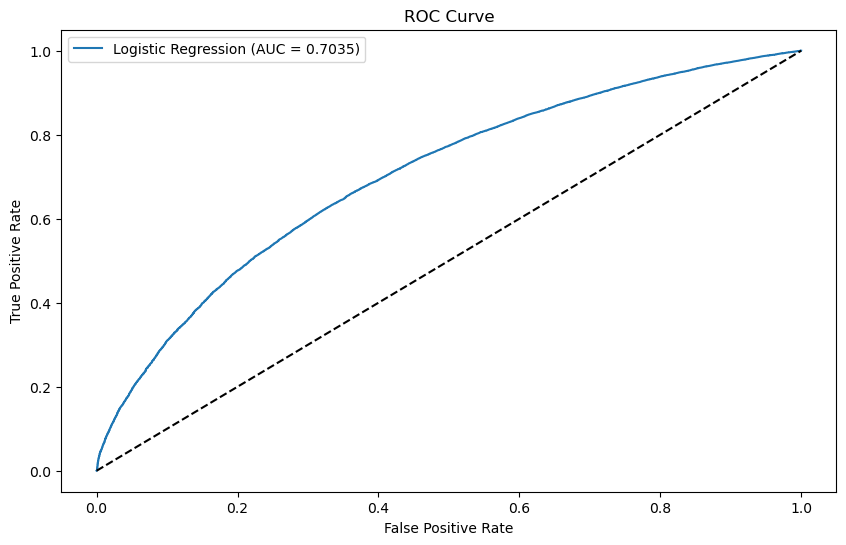

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming y_pred_prob_logreg contains probabilities for the positive class
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_prob_logreg, pos_label='Fully Paid')

# Compute ROC AUC score without pos_label
roc_auc_logreg = roc_auc_score(y_test, y_pred_prob_logreg)

plt.figure(figsize=(10, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


These metrics give you a snapshot of your model's performance in predicting loan defaults. Here’s what each metric signifies:

    Accuracy (0.8031):
        Definition: The proportion of correctly classified instances (both default and non-default) out of the total instances.
        Interpretation: About 80.31% of the predictions are correct. While this is a good accuracy rate, it may not fully capture the model's performance if the dataset is imbalanced (e.g., if defaults are rare).

    Precision (0.8080):
        Definition: The proportion of true positives (correctly predicted defaults) out of all predicted positives (both true positives and false positives).
        Interpretation: Of all the instances the model predicted as defaults, 80.80% are actually defaults. This indicates that the model is fairly accurate when it predicts a default, but there’s still some room for improvement.

    Recall (0.9903):
        Definition: The proportion of true positives out of all actual positives (true positives and false negatives).
        Interpretation: The model correctly identifies 99.03% of all actual defaults. This high recall indicates that the model is very effective at detecting defaults, which is crucial for this problem since missing a default could be costly.

    F1 Score (0.8899):
        Definition: The harmonic mean of precision and recall, providing a balance between the two metrics.
        Interpretation: An F1 Score of 0.8899 suggests a strong overall performance, balancing the precision and recall. It indicates that the model performs well in both identifying defaults (high recall) and minimizing false positives (high precision).

Summary:

    The model has high recall and F1 Score, meaning it’s very good at detecting defaults while maintaining a balanced trade-off between precision and recall.
    The accuracy is also high, but given the potential class imbalance, the F1 Score and recall provide a clearer picture of the model's effectiveness in predicting defaults.

In a loan default prediction scenario, high recall is often more critical because you want to catch as many defaults as possible. Balancing it with precision (to avoid too many false positives) is also important for practical decision-making.

The ROC-AUC score of 0.7035 indicates how well your Logistic Regression model is distinguishing between the two classes in your classification problem. An ROC-AUC score of 0.7035 suggests that your model has a reasonably good ability to discriminate between the positive and negative classes, with 1.0 being a perfect model and 0.5 indicating no discrimination (similar to random guessing).

Here’s a summary of what the ROC-AUC score means:

    0.5: The model has no discrimination ability (like random guessing).
    0.7 - 0.8: The model has a moderate level of discrimination ability.
    0.8 - 0.9: The model has a good level of discrimination ability.
    0.9 - 1.0: The model has excellent discrimination ability.

If you’re aiming to improve this score, you might consider:

    Feature Engineering: Adding or transforming features to improve the model's ability to discriminate between classes.
    Model Tuning: Adjusting hyperparameters or trying different models.
    Handling Imbalanced Data: If your classes are imbalanced, techniques like resampling or using different evaluation metrics might be beneficial.
    Cross-validation: Ensuring that the model’s performance is consistent across different subsets of the data.

In [26]:
# Save the models

import joblib

joblib.dump(logreg_pipeline, 'logreg_pipeline.pkl')

['logreg_pipeline.pkl']

In [1]:
# Coefficients from the logistic regression model
model = logreg_pipeline.named_steps['logisticregression']
feature_importance = model.coef_[0]
features = X_train.columns

# Display feature importance
for feature, importance in zip(features, feature_importance):
    print(f'{feature}: {importance}')


NameError: name 'logreg_pipeline' is not defined